<a href="https://colab.research.google.com/github/ravitejagvs/The-best-classifier/blob/master/tf2classi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip uninstall tensorflow
!pip install tensorflow==2.1.0
!pip install keras

Uninstalling tensorflow-2.1.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.1.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.1.0
  Using cached https://files.pythonhosted.org/packages/85/d4/c0cd1057b331bc38b65478302114194bd8e1b9c2bbc06e300935c0e93d90/tensorflow-2.1.0-cp36-cp36m-manylinux2010_x86_64.whl


In [0]:
!pip uninstall tensorflow-gpu

In [0]:
!pip install tensorflow

In [0]:
import tensorflow as tf

In [13]:
tf.__version__

'2.1.0'

In [0]:
import pandas as pd  


In [0]:
model = tf.keras.models.Sequential([
                                     tf.keras.layers.Flatten(input_shape=(28,28)),
                                     tf.keras.layers.Dense(128, activation="relu"),
                                     tf.keras.layers.Dropout(0.2),
                                     tf.keras.layers.Dense(10)                                                          
])

In [0]:
#get the data
from __future__ import absolute_import, division, print_function, unicode_literals
mnist = tf.keras.datasets.mnist

In [18]:
#split the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0                 # Converting to floating point numbers

11493376/11490434 [==============================] - 0s 0us/step


(28, 28) 5


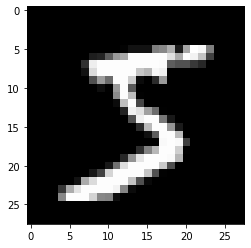

In [20]:
import matplotlib.pyplot as plt
import numpy as np

img1_arr, img1_label = x_train[0], y_train[0]
print (img1_arr.shape, img1_label)

img1_2d = np.reshape(img1_arr, (28, 28))

plt.subplot(111)
plt.imshow(img1_2d, cmap=plt.get_cmap('gray'))
plt.show()

In [21]:
predictions = model(x_train[:1]).numpy()
predictions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[-0.11964636, -0.64055026, -0.08487917, -0.20585582, -0.04780508,
        -0.41538432, -0.30153343, -0.06715261, -0.1680243 ,  0.29785505]],
      dtype=float32)

In [22]:
tf.nn.softmax(predictions).numpy()

array([[0.10284088, 0.06108578, 0.10647925, 0.09434643, 0.11050096,
        0.0765118 , 0.08573798, 0.10838359, 0.09798407, 0.15612927]],
      dtype=float32)

In [0]:
#loss function

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [24]:
loss_fn(y_train[:1], predictions).numpy()

2.5703104

In [25]:
#model compile and fit
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2968 - accuracy: 0.9133
Epoch 2/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1420 - accuracy: 0.9575
Epoch 3/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.1077 - accuracy: 0.9673
Epoch 4/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0882 - accuracy: 0.9729
Epoch 5/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0746 - accuracy: 0.9763


In [26]:
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 0s - loss: 0.0750 - accuracy: 0.9778


[0.07502425374649466, 0.9778]

Original digit =  9
Predicted digit =  9


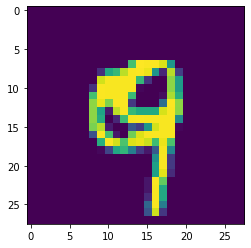

In [27]:
image_index = 4444

print("Original digit = ",y_test[image_index])
print("Predicted digit = ",model.predict_classes(x_test)[image_index])

plt.imshow(x_test[image_index])
plt.show()


In [0]:
from sklearn.metrics import confusion_matrix as cm

In [0]:
original  = y_test
predicted = model.predict_classes(x_test)

In [31]:
cm(original,predicted)

array([[ 973,    1,    1,    0,    1,    1,    1,    1,    1,    0],
       [   0, 1126,    3,    0,    0,    1,    2,    1,    2,    0],
       [   8,    1,  994,    6,    2,    0,    2,   13,    6,    0],
       [   0,    0,    3,  982,    0,    8,    0,    8,    5,    4],
       [   1,    0,    3,    0,  961,    0,    3,    4,    2,    8],
       [   2,    0,    0,    5,    1,  877,    4,    1,    1,    1],
       [   5,    3,    0,    1,    6,    5,  936,    0,    2,    0],
       [   1,    3,    9,    0,    1,    0,    0, 1009,    0,    5],
       [   3,    1,    1,    6,    4,    7,    3,    6,  942,    1],
       [   3,    2,    0,    4,   10,    3,    0,    8,    1,  978]])

In [33]:
from sklearn.metrics import recall_score as recall
recall(original,predicted, average='weighted')

0.9778